# Sizing & Drawing of C-DAC with Input Tracking Capacitor

**Copyright 2024 Simon Dorrer**

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0

In [107]:
# Packages
import numpy as np
import scipy.constants as spc
import matplotlib.pyplot as plt

plt.close("all")
# %matplotlib qt
%matplotlib inline

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 14)

## Ideal DAC

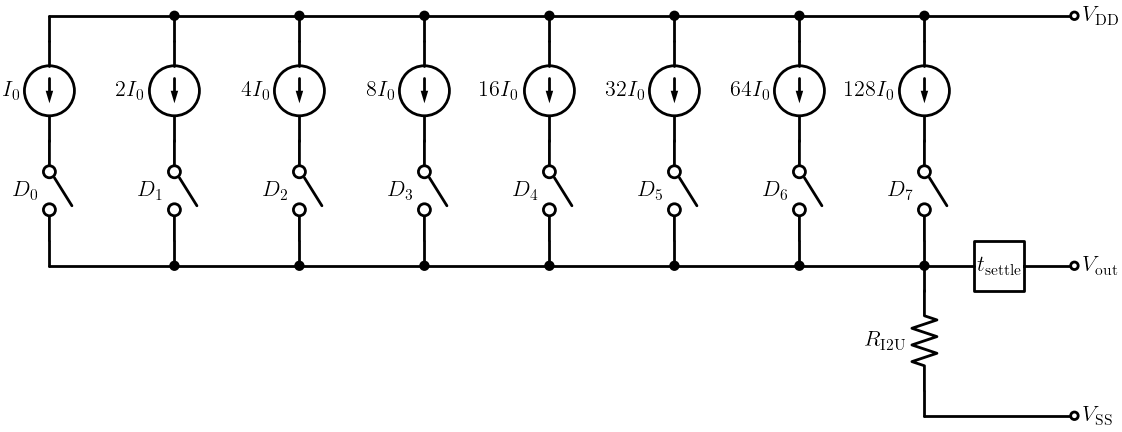

In [108]:
# Draw ideal DAC
import matplotlib
matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern"
})
import schemdraw as sd
import schemdraw.elements as elm
import schemdraw.dsp as dsp
sd.svgconfig.svg2 = False
with sd.Drawing() as d:
    d.config(unit=2)
    d.config(fontsize=16)
    
    # Vout + settle delay
    elm.Dot(open=True).label('$V_\mathrm{out}$', loc='right')
    elm.Line().left().length(1)
    dsp.Square().left().label('$t_\mathrm{settle}$')
    elm.Line().left().length(18.5)

    # I_0
    elm.Line().up().length(0.5)
    elm.Switch().up().label('$D_0$').reverse().flip()
    elm.SourceI().up().label('$I_0$').reverse()
    elm.Line().up().length(0.5)
    elm.Line().right().length(2.5).dot()
    d.push()

    # 2 * I_0
    elm.Line().down().length(0.5)
    elm.SourceI().down().label('$2 I_0$')
    elm.Switch().down().label('$D_1$')
    elm.Line().down().length(0.5).dot()
    d.pop()
    elm.Line().right().length(2.5).dot()
    d.push()

    # 4 * I_0
    elm.Line().down().length(0.5)
    elm.SourceI().down().label('$4 I_0$')
    elm.Switch().down().label('$D_2$')
    elm.Line().down().length(0.5).dot()
    d.pop()
    elm.Line().right().length(2.5).dot()
    d.push()

    # 8 * I_0
    elm.Line().down().length(0.5)
    elm.SourceI().down().label('$8 I_0$')
    elm.Switch().down().label('$D_3$')
    elm.Line().down().length(0.5).dot()
    d.pop()
    elm.Line().right().length(2.5).dot()
    d.push()

    # 16 * I_0
    elm.Line().down().length(0.5)
    elm.SourceI().down().label('$16 I_0$')
    elm.Switch().down().label('$D_4$')
    elm.Line().down().length(0.5).dot()
    d.pop()
    elm.Line().right().length(2.5).dot()
    d.push()

    # 32 * I_0
    elm.Line().down().length(0.5)
    elm.SourceI().down().label('$32 I_0$')
    elm.Switch().down().label('$D_5$')
    elm.Line().down().length(0.5).dot()
    d.pop()
    elm.Line().right().length(2.5).dot()
    d.push()

    # 64 * I_0
    elm.Line().down().length(0.5)
    elm.SourceI().down().label('$64 I_0$')
    elm.Switch().down().label('$D_6$')
    elm.Line().down().length(0.5).dot()
    d.pop()
    elm.Line().right().length(2.5).dot()
    d.push()

    # 128 * I_0
    elm.Line().down().length(0.5)
    elm.SourceI().down().label('$128 I_0$')
    elm.Switch().down().label('$D_7$')
    elm.Line().down().length(0.5).dot()
    elm.Line().down().length(0.5)
    elm.Resistor().down().label('$R_\mathrm{I2U}$')
    elm.Line().down().length(0.5)
    elm.Line().right().length(3).dot(open=True).label('$V_\mathrm{SS}$', loc='right')
    d.pop()
    elm.Line().right().length(3).dot(open=True).label('$V_\mathrm{DD}$', loc='right')

    # Save the schematic
    d.save('figures/dac/ideal_DAC.svg')
    d.save('figures/dac/ideal_DAC.pdf')

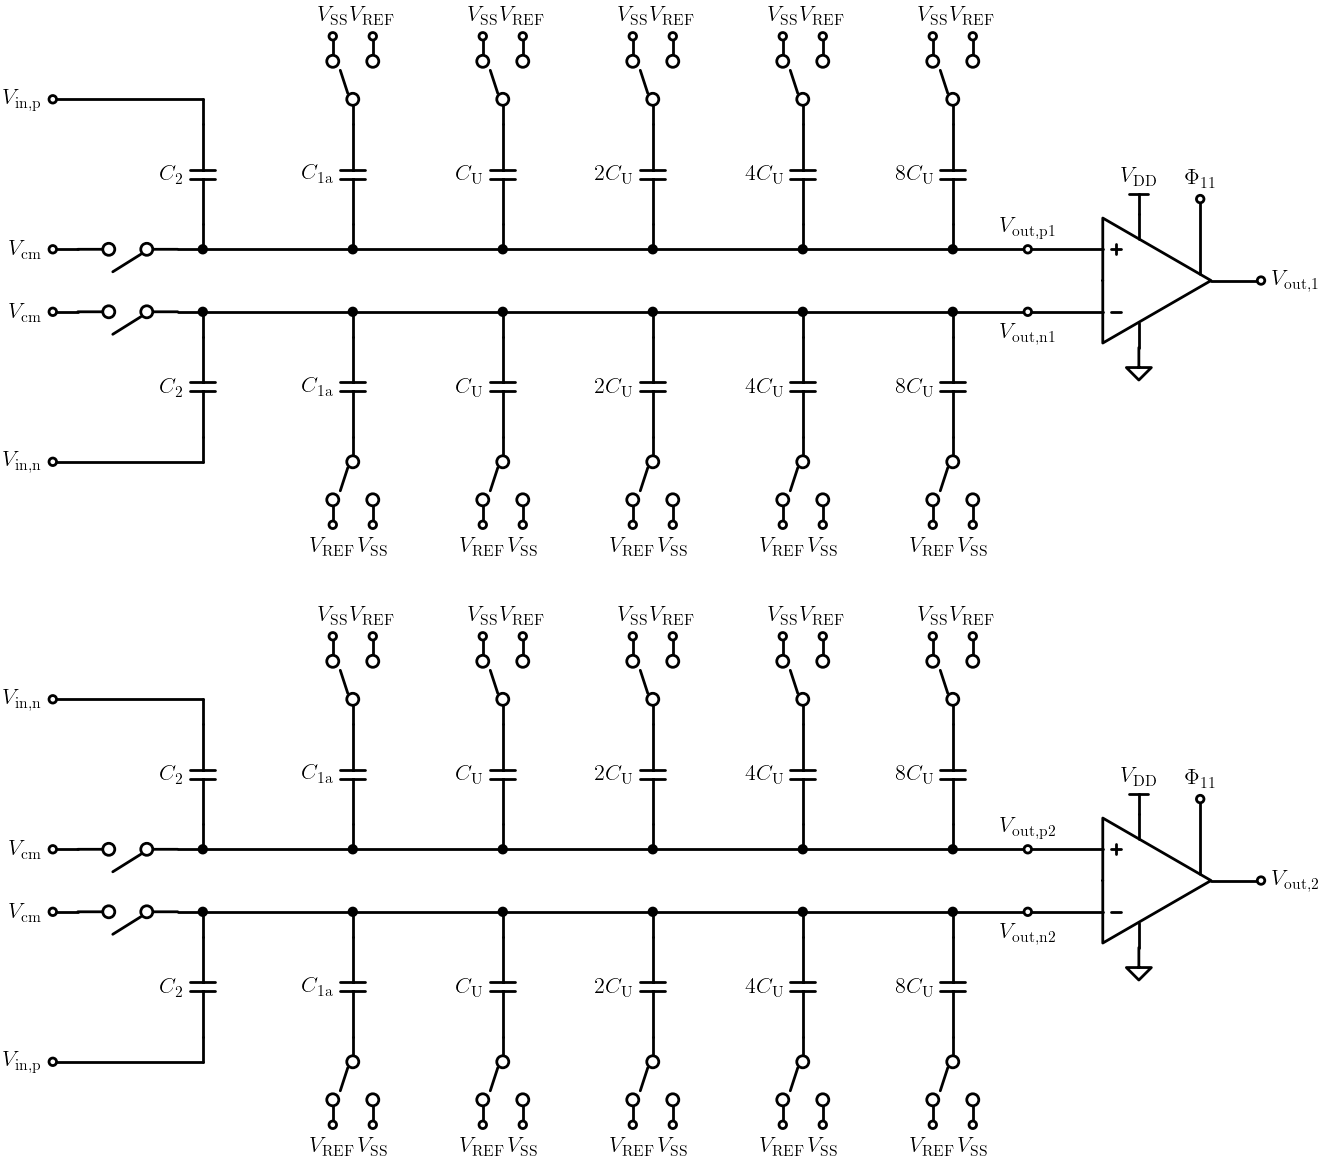

In [109]:
# Draw DAC
import matplotlib
matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern"
})
import schemdraw as sd
import schemdraw.elements as elm
sd.svgconfig.svg2 = False
with sd.Drawing() as d:
    d.config(unit=2)
    d.config(fontsize=16)

    # Vinp + C2
    elm.Dot(open=True).label('$V_\mathrm{in,p}$', loc='left', ofst=0.15)
    startDot = d.here
    elm.Line().right().length(3)
    elm.Line().down().length(0.5)
    # elm.Capacitor().label('$C_\mathrm{P}$', loc='top', ofst=0.15).label(r'100\,fF', loc='bottom', ofst=0.15)
    C2 = elm.Capacitor().label('$C_\mathrm{2}$', loc='top', ofst=0.15)
    elm.Line().down().length(0.5).dot()
    d.push()

    # Switch + Vcm
    elm.Line().left().length(0.5)
    elm.Switch()
    elm.Line().left().tox(startDot)
    elm.Dot(open=True).label('$V_\mathrm{cm}$', loc='left', ofst=0.15)

    # C1a + SPDT
    d.pop()
    elm.Line().right().length(3).dot()
    d.push()
    elm.Line().up().length(0.5)
    C1a = elm.Capacitor().label('$C_\mathrm{1a}$', loc='top', ofst=0.15)
    elm.Line().up().length(0.5)
    SPDT1a = elm.SwitchSpdt2().anchor('a')
    elm.Line().at(SPDT1a.b).up().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{SS}$', loc='top', ofst=0.15)
    elm.Line().at(SPDT1a.c).up().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{REF}$', loc='top', ofst=0.15)

    # Cu + SPDT HZ
    d.pop()
    elm.Line().right().length(3).dot()
    d.push()
    elm.Line().up().length(0.5)
    Cu = elm.Capacitor().label('$C_\mathrm{U}$', loc='top', ofst=0.15)
    elm.Line().up().length(0.5)
    SPDT1a = elm.SwitchSpdt2().anchor('a')
    elm.Line().at(SPDT1a.b).up().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{SS}$', loc='top', ofst=0.15)
    elm.Line().at(SPDT1a.c).up().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{REF}$', loc='top', ofst=0.15)

    # 2 Cu + SPDT HZ
    d.pop()
    elm.Line().right().length(3).dot()
    d.push()
    elm.Line().up().length(0.5)
    Cu = elm.Capacitor().label('$2 C_\mathrm{U}$', loc='top', ofst=0.15)
    elm.Line().up().length(0.5)
    SPDT1a = elm.SwitchSpdt2().anchor('a')
    elm.Line().at(SPDT1a.b).up().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{SS}$', loc='top', ofst=0.15)
    elm.Line().at(SPDT1a.c).up().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{REF}$', loc='top', ofst=0.15)

    # 4 Cu + SPDT HZ
    d.pop()
    elm.Line().right().length(3).dot()
    d.push()
    elm.Line().up().length(0.5)
    Cu = elm.Capacitor().label('$4 C_\mathrm{U}$', loc='top', ofst=0.15)
    elm.Line().up().length(0.5)
    SPDT1a = elm.SwitchSpdt2().anchor('a')
    elm.Line().at(SPDT1a.b).up().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{SS}$', loc='top', ofst=0.15)
    elm.Line().at(SPDT1a.c).up().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{REF}$', loc='top', ofst=0.15)

    # 8 Cu + SPDT HZ
    d.pop()
    elm.Line().right().length(3).dot()
    d.push()
    elm.Line().up().length(0.5)
    Cu = elm.Capacitor().label('$8 C_\mathrm{U}$', loc='top', ofst=0.15)
    elm.Line().up().length(0.5)
    SPDT1a = elm.SwitchSpdt2().anchor('a')
    elm.Line().at(SPDT1a.b).up().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{SS}$', loc='top', ofst=0.15)
    elm.Line().at(SPDT1a.c).up().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{REF}$', loc='top', ofst=0.15)

    # Voutp1
    d.pop()
    elm.Line().right().length(1.5)
    elm.Dot(open=True).label('$V_\mathrm{out,p1}$', loc='top', ofst=0.15)

    # Comparator 1
    elm.Line().right().length(1.5)
    upper_comp = elm.Opamp().anchor('in2').flip()
    elm.Line().at(upper_comp.n1a).up().length(1.5)
    elm.Dot(open=True).label('$\Phi_\mathrm{11}$', loc='top', ofst=0.15)
    elm.Line().at(upper_comp.vs).up().length(0.5)
    elm.Vdd().label('$V_\mathrm{DD}$', loc='top', ofst=0.15)
    elm.Line().at(upper_comp.vd).down().length(0.5)
    elm.GroundSignal()

    # Vout
    elm.Line().at(upper_comp.out).right().length(1.0)
    elm.Dot(open=True).label('$V_\mathrm{out,1}$', loc='right', ofst=0.15)
    # =======================================================================

    # Vinn + C2
    elm.Dot(open=True).at((startDot.x, upper_comp.in1.y-3)).label('$V_\mathrm{in,n}$', loc='left', ofst=0.15)
    elm.Line().right().length(3)
    elm.Line().up().length(0.5)
    # elm.Capacitor().label('$C_\mathrm{P}$', loc='top', ofst=0.15).label(r'100\,fF', loc='bottom', ofst=0.15)
    C2 = elm.Capacitor().label('$C_\mathrm{2}$', loc='top', ofst=0.15)
    elm.Line().up().length(0.5).dot()
    d.push()

    # Switch + Vcm
    elm.Line().left().length(0.5)
    elm.Switch()
    elm.Line().left().tox(startDot)
    elm.Dot(open=True).label('$V_\mathrm{cm}$', loc='left', ofst=0.15)

    # C1a + SPDT
    d.pop()
    elm.Line().right().length(3).dot()
    d.push()
    elm.Line().down().length(0.5)
    C1a = elm.Capacitor().label('$C_\mathrm{1a}$', loc='top', ofst=0.15)
    elm.Line().down().length(0.5)
    SPDT1b = elm.SwitchSpdt2().anchor('a').flip()
    elm.Line().at(SPDT1b.c).down().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{SS}$', loc='bottom', ofst=0.15)
    elm.Line().at(SPDT1b.b).down().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{REF}$', loc='bottom', ofst=0.15)

    # Cu + SPDT HZ
    d.pop()
    elm.Line().right().length(3).dot()
    d.push()
    elm.Line().down().length(0.5)
    Cu = elm.Capacitor().label('$C_\mathrm{U}$', loc='top', ofst=0.15)
    elm.Line().down().length(0.5)
    SPDT1b = elm.SwitchSpdt2().anchor('a').flip()
    elm.Line().at(SPDT1b.c).down().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{SS}$', loc='bottom', ofst=0.15)
    elm.Line().at(SPDT1b.b).down().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{REF}$', loc='bottom', ofst=0.15)

    # 2 Cu + SPDT HZ
    d.pop()
    elm.Line().right().length(3).dot()
    d.push()
    elm.Line().down().length(0.5)
    Cu = elm.Capacitor().label('$2 C_\mathrm{U}$', loc='top', ofst=0.15)
    elm.Line().down().length(0.5)
    SPDT1b = elm.SwitchSpdt2().anchor('a').flip()
    elm.Line().at(SPDT1b.c).down().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{SS}$', loc='bottom', ofst=0.15)
    elm.Line().at(SPDT1b.b).down().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{REF}$', loc='bottom', ofst=0.15)

    # 4 Cu + SPDT HZ
    d.pop()
    elm.Line().right().length(3).dot()
    d.push()
    elm.Line().down().length(0.5)
    Cu = elm.Capacitor().label('$4 C_\mathrm{U}$', loc='top', ofst=0.15)
    elm.Line().down().length(0.5)
    SPDT1b = elm.SwitchSpdt2().anchor('a').flip()
    elm.Line().at(SPDT1b.c).down().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{SS}$', loc='bottom', ofst=0.15)
    elm.Line().at(SPDT1b.b).down().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{REF}$', loc='bottom', ofst=0.15)

    # 8 Cu + SPDT HZ
    d.pop()
    elm.Line().right().length(3).dot()
    d.push()
    elm.Line().down().length(0.5)
    Cu = elm.Capacitor().label('$8 C_\mathrm{U}$', loc='top', ofst=0.15)
    elm.Line().down().length(0.5)
    SPDT1b = elm.SwitchSpdt2().anchor('a').flip()
    elm.Line().at(SPDT1b.c).down().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{SS}$', loc='bottom', ofst=0.15)
    elm.Line().at(SPDT1b.b).down().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{REF}$', loc='bottom', ofst=0.15)

    # Voutn1
    d.pop()
    elm.Line().right().length(1.5)
    elm.Dot(open=True).label('$V_\mathrm{out,n1}$', loc='bottom', ofst=0.15)
    elm.Line().right().tox(upper_comp.in1.x)
    # =======================================================================

    # Vinn + C2
    elm.Dot(open=True).at((startDot.x,startDot.y-12)).label('$V_\mathrm{in,n}$', loc='left', ofst=0.15)
    startDot = d.here
    elm.Line().right().length(3)
    elm.Line().down().length(0.5)
    # elm.Capacitor().label('$C_\mathrm{P}$', loc='top', ofst=0.15).label(r'100\,fF', loc='bottom', ofst=0.15)
    C2 = elm.Capacitor().label('$C_\mathrm{2}$', loc='top', ofst=0.15)
    elm.Line().down().length(0.5).dot()
    d.push()

    # Switch + Vcm
    elm.Line().left().length(0.5)
    elm.Switch()
    elm.Line().left().tox(startDot)
    elm.Dot(open=True).label('$V_\mathrm{cm}$', loc='left', ofst=0.15)

    # C1a + SPDT
    d.pop()
    elm.Line().right().length(3).dot()
    d.push()
    elm.Line().up().length(0.5)
    C1a = elm.Capacitor().label('$C_\mathrm{1a}$', loc='top', ofst=0.15)
    elm.Line().up().length(0.5)
    SPDT1a = elm.SwitchSpdt2().anchor('a')
    elm.Line().at(SPDT1a.b).up().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{SS}$', loc='top', ofst=0.15)
    elm.Line().at(SPDT1a.c).up().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{REF}$', loc='top', ofst=0.15)

    # Cu + SPDT HZ
    d.pop()
    elm.Line().right().length(3).dot()
    d.push()
    elm.Line().up().length(0.5)
    Cu = elm.Capacitor().label('$C_\mathrm{U}$', loc='top', ofst=0.15)
    elm.Line().up().length(0.5)
    SPDT1a = elm.SwitchSpdt2().anchor('a')
    elm.Line().at(SPDT1a.b).up().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{SS}$', loc='top', ofst=0.15)
    elm.Line().at(SPDT1a.c).up().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{REF}$', loc='top', ofst=0.15)

    # 2 Cu + SPDT HZ
    d.pop()
    elm.Line().right().length(3).dot()
    d.push()
    elm.Line().up().length(0.5)
    Cu = elm.Capacitor().label('$2 C_\mathrm{U}$', loc='top', ofst=0.15)
    elm.Line().up().length(0.5)
    SPDT1a = elm.SwitchSpdt2().anchor('a')
    elm.Line().at(SPDT1a.b).up().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{SS}$', loc='top', ofst=0.15)
    elm.Line().at(SPDT1a.c).up().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{REF}$', loc='top', ofst=0.15)

    # 4 Cu + SPDT HZ
    d.pop()
    elm.Line().right().length(3).dot()
    d.push()
    elm.Line().up().length(0.5)
    Cu = elm.Capacitor().label('$4 C_\mathrm{U}$', loc='top', ofst=0.15)
    elm.Line().up().length(0.5)
    SPDT1a = elm.SwitchSpdt2().anchor('a')
    elm.Line().at(SPDT1a.b).up().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{SS}$', loc='top', ofst=0.15)
    elm.Line().at(SPDT1a.c).up().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{REF}$', loc='top', ofst=0.15)

    # 8 Cu + SPDT HZ
    d.pop()
    elm.Line().right().length(3).dot()
    d.push()
    elm.Line().up().length(0.5)
    Cu = elm.Capacitor().label('$8 C_\mathrm{U}$', loc='top', ofst=0.15)
    elm.Line().up().length(0.5)
    SPDT1a = elm.SwitchSpdt2().anchor('a')
    elm.Line().at(SPDT1a.b).up().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{SS}$', loc='top', ofst=0.15)
    elm.Line().at(SPDT1a.c).up().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{REF}$', loc='top', ofst=0.15)

    # Voutp2
    d.pop()
    elm.Line().right().length(1.5)
    elm.Dot(open=True).label('$V_\mathrm{out,p2}$', loc='top', ofst=0.15)

    # Comparator 2
    elm.Line().right().length(1.5)
    lower_comp = elm.Opamp().anchor('in2').flip()
    elm.Line().at(lower_comp.n1a).up().length(1.5)
    elm.Dot(open=True).label('$\Phi_\mathrm{11}$', loc='top', ofst=0.15)
    elm.Line().at(lower_comp.vs).up().length(0.5)
    elm.Vdd().label('$V_\mathrm{DD}$', loc='top', ofst=0.15)
    elm.Line().at(lower_comp.vd).down().length(0.5)
    elm.GroundSignal()

    # Vout
    elm.Line().at(lower_comp.out).right().length(1.0)
    elm.Dot(open=True).label('$V_\mathrm{out,2}$', loc='right', ofst=0.15)
    # =======================================================================

    # Vinp + C2
    elm.Dot(open=True).at((startDot.x, lower_comp.in1.y-3)).label('$V_\mathrm{in,p}$', loc='left', ofst=0.15)
    elm.Line().right().length(3)
    elm.Line().up().length(0.5)
    # elm.Capacitor().label('$C_\mathrm{P}$', loc='top', ofst=0.15).label(r'100\,fF', loc='bottom', ofst=0.15)
    C2 = elm.Capacitor().label('$C_\mathrm{2}$', loc='top', ofst=0.15)
    elm.Line().up().length(0.5).dot()
    d.push()

    # Switch + Vcm
    elm.Line().left().length(0.5)
    elm.Switch()
    elm.Line().left().tox(startDot)
    elm.Dot(open=True).label('$V_\mathrm{cm}$', loc='left', ofst=0.15)

    # C1a + SPDT
    d.pop()
    elm.Line().right().length(3).dot()
    d.push()
    elm.Line().down().length(0.5)
    C1a = elm.Capacitor().label('$C_\mathrm{1a}$', loc='top', ofst=0.15)
    elm.Line().down().length(0.5)
    SPDT1b = elm.SwitchSpdt2().anchor('a').flip()
    elm.Line().at(SPDT1b.c).down().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{SS}$', loc='bottom', ofst=0.15)
    elm.Line().at(SPDT1b.b).down().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{REF}$', loc='bottom', ofst=0.15)

    # Cu + SPDT HZ
    d.pop()
    elm.Line().right().length(3).dot()
    d.push()
    elm.Line().down().length(0.5)
    Cu = elm.Capacitor().label('$C_\mathrm{U}$', loc='top', ofst=0.15)
    elm.Line().down().length(0.5)
    SPDT1b = elm.SwitchSpdt2().anchor('a').flip()
    elm.Line().at(SPDT1b.c).down().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{SS}$', loc='bottom', ofst=0.15)
    elm.Line().at(SPDT1b.b).down().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{REF}$', loc='bottom', ofst=0.15)

    # 2 Cu + SPDT HZ
    d.pop()
    elm.Line().right().length(3).dot()
    d.push()
    elm.Line().down().length(0.5)
    Cu = elm.Capacitor().label('$2 C_\mathrm{U}$', loc='top', ofst=0.15)
    elm.Line().down().length(0.5)
    SPDT1b = elm.SwitchSpdt2().anchor('a').flip()
    elm.Line().at(SPDT1b.c).down().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{SS}$', loc='bottom', ofst=0.15)
    elm.Line().at(SPDT1b.b).down().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{REF}$', loc='bottom', ofst=0.15)

    # 4 Cu + SPDT HZ
    d.pop()
    elm.Line().right().length(3).dot()
    d.push()
    elm.Line().down().length(0.5)
    Cu = elm.Capacitor().label('$4 C_\mathrm{U}$', loc='top', ofst=0.15)
    elm.Line().down().length(0.5)
    SPDT1b = elm.SwitchSpdt2().anchor('a').flip()
    elm.Line().at(SPDT1b.c).down().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{SS}$', loc='bottom', ofst=0.15)
    elm.Line().at(SPDT1b.b).down().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{REF}$', loc='bottom', ofst=0.15)

    # 8 Cu + SPDT HZ
    d.pop()
    elm.Line().right().length(3).dot()
    d.push()
    elm.Line().down().length(0.5)
    Cu = elm.Capacitor().label('$8 C_\mathrm{U}$', loc='top', ofst=0.15)
    elm.Line().down().length(0.5)
    SPDT1b = elm.SwitchSpdt2().anchor('a').flip()
    elm.Line().at(SPDT1b.c).down().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{SS}$', loc='bottom', ofst=0.15)
    elm.Line().at(SPDT1b.b).down().length(0.5)
    elm.Dot(open=True).label('$V_\mathrm{REF}$', loc='bottom', ofst=0.15)

    # Voutn2
    d.pop()
    elm.Line().right().length(1.5)
    elm.Dot(open=True).label('$V_\mathrm{out,n2}$', loc='bottom', ofst=0.15)
    elm.Line().right().tox(lower_comp.in1.x)
    # =======================================================================

    # Dummies for Inkscape
    # elm.Dot(open=True).at((startDot.x,startDot.y+1)).label('$\Phi_\mathrm{7}$', loc='left', ofst=0.15)
    # elm.Line().right().length(0.5)
    # elm.Dot(open=True).at((startDot.x,startDot.y+2)).label('$\overline{\Phi_\mathrm{7}}$', loc='left', ofst=0.15)
    # elm.Line().right().length(0.5)
    # elm.Dot(open=True).at((startDot.x,startDot.y+3)).label('$\Phi_\mathrm{8}$', loc='left', ofst=0.15)
    # elm.Line().right().length(0.5)
    # elm.Dot(open=True).at((startDot.x,startDot.y+4)).label('$\overline{\Phi_\mathrm{8}}$', loc='left', ofst=0.15)
    # elm.Line().right().length(0.5)
    # =======================================================================

    # Save the schematic
    d.save('figures/dac/dac_circuit.svg')
    d.save('figures/dac/dac_circuit.pdf')

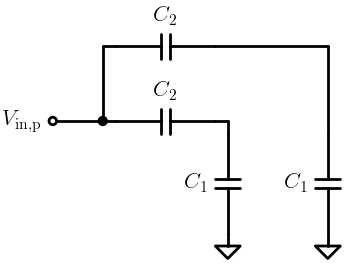

In [110]:
# Draw DAC - Input Capacitance
import matplotlib
matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern"
})
import schemdraw as sd
import schemdraw.elements as elm
sd.svgconfig.svg2 = False
with sd.Drawing() as d:
    d.config(unit=2)
    d.config(fontsize=16)

    # C2 / C1 (Upper)
    elm.Dot(open=True).label('$V_\mathrm{in,p}$', loc='left', ofst=0.15)
    elm.Line().right().length(1).dot()
    d.push()
    elm.Line().up().length(1.5)
    elm.Line().right().length(0.25)
    C2 = elm.Capacitor().label('$C_\mathrm{2}$', loc='top', ofst=0.15)
    elm.Line().right().length(2.25)
    elm.Line().down().length(1.75)
    C1 = elm.Capacitor().label('$C_\mathrm{1}$', loc='top', ofst=0.15)
    elm.Line().down().length(0.25)
    elm.GroundSignal(lead=False)
    
    # C2 / C1 (Lower)
    d.pop()
    elm.Line().right().length(0.25)
    C2 = elm.Capacitor().label('$C_\mathrm{2}$', loc='top', ofst=0.15)
    elm.Line().right().length(0.25)
    elm.Line().down().length(0.25)
    C1 = elm.Capacitor().label('$C_\mathrm{1}$', loc='top', ofst=0.15)
    elm.Line().down().length(0.25)
    elm.GroundSignal(lead=False)

    # Save the schematic
    d.save('figures/dac/dac_Cin_circuit.svg')
    d.save('figures/dac/dac_Cin_circuit.pdf')

In [111]:
# Variables
T = 300 # in Kelvin (~ 27°C)
VDD = 1.5
Vref = VDD
Vcm = 0.75

# Read N from sizing_DT_comparator.ipynb
%store -r N
N = N # N = 7 # max. resolution in bits
M = 5 # max. amount of adaptive thresholds (e.g. N = 5: 1, 2, 4, 8 or 16 LSB, adapt resolution from 7-Bit to 3-Bit)

C_2 = 1024e-15

In [112]:
# C_1 for chosen N and M

# Vlsb for fully-differential output is twice as high as Vlsb of single-ended output!
# Vlsb = 2 * C_1 / C_2 * Vref = 2 * VDD / 2**N

C_1 = np.zeros(M)
# C_1[0] = VDD / Vref * C_2 / 2**N
for i in range(M):
  C_1[i] = VDD / Vref * C_2 / 2**(N-i)
  # C_1[i + 1] = 2**(i + 1) * C_1[0]

# C1's are connected in parallel
C_1_total_default = np.sum(C_1) # total capacitance, default architecture

In [113]:
# LSB voltages for calculated C1 and C2
Vlsb = np.zeros(M)
for i in range(M):
  Vlsb[i] = 2 * C_1[i] / C_2 * Vref

In [114]:
# Start / Reset voltage at t = 0
# vstart1(t=0) = voutp1(t=0) - voutn1(t=0) = - 2 C_1 / (C_1 + C_2) * Vref
vstart1 = np.zeros(M)
for i in range(M):
  vstart1[i] = - 2 * C_1[i] / (C_1[i] + C_2) * Vref

# vstart2(t=0) = voutp2(t=0) - voutn2(t=0) = + 2 C_1 / (C_1 + C_2) * Vref
vstart2 = np.zeros(M)
for i in range(M):
  vstart2[i] = + 2 * C_1[i] / (C_1[i] + C_2) * Vref

In [115]:
# Input capacitance
C_1_total = C_1[M-1] # total capacitance with thermometer code architecture

Cin_min = 2 * (C_2 * C_1[0]) / (C_2 + C_1[0]) # at 1 LSB

Cin_max = 2 * (C_2 * C_1_total) / (C_2 + C_1_total) # at 2**(M-1) LSB

In [116]:
# Output Noise
vnoise_max = np.sqrt(spc.k * T / Cin_min) # at 1 LSB

vnoise_min = np.sqrt(spc.k * T / Cin_max) # at 2**(M-1) LSB

In [117]:
# Calculate the minimum (Tmin) and average (Tavg) time between sampled sine data
Vfs = VDD # fully-differential in Vp
fsig = 512

Tmin = np.zeros(M)
fmax = np.zeros(M)
Tavg = np.zeros(M)
favg = np.zeros(M)
for i in range(M):
  Tmin[i] = VDD / (2**(N-i)* Vfs * np.pi * fsig)
  # Tmin[i] = 1 / (2**(N-i) * np.pi * fsig)
  fmax[i] = 1 / Tmin[i]

  Tavg[i] = VDD / (2**(N-i+1) * Vfs * fsig)
  # Tavg[i] = 1 / (2**(N-i+1) * fsig)
  favg[i] = 1 / Tavg[i]

In [118]:
# Calculate the energy per conversion
epc = np.zeros(M)
for i in range(M):
  epc[i] = 4 * (C_1[i] * C_2) / (C_1[i] + C_2) * Vref**2

In [119]:
# Calculate total power consumption
samples = 128

power = np.zeros(M)
for i in range(M):
  power[i] = epc[i] * samples * fsig

In [120]:
# Printing results

# Resolution and number of adaptive thresholds
print('Resolution and number of adaptive thresholds:')
print('Resolution =', N, 'Bit')
print('Number of adaptive thresholds =', M)
print('The resolution can be adapted from', N, 'Bit (', 1, 'LSB) to ', N - (M - 1), 'Bit (', 2**(M - 1), 'LSB). ')
print('============================================= \n')

# Input tracking capacitor C2
print('Input tracking capacitor C2:')
print('C_2 =', round(float(C_2 * 1e15), 2), 'fF')
print('============================================= \n')

# C1 capacitors
print('Adaptive capacitors C1:')
for i in range(M):
  print('C_1[', i, '] =', round(float(C_1[i] * 1e15), 2), 'fF')
print('C_1_total =', round(float(C_1_total_default * 1e15), 2), 'fF with default architecture.')
print('C_1_total =', round(float(C_1_total * 1e15), 2), 'fF with thermometer code.')
print('============================================= \n')

# LSB voltages
print('LSB voltages:')
for i in range(M):
  print(2**i, 'LSB =', round(float(Vlsb[i] * 1e3), 2), 'mV')
print('============================================= \n')

# Start / Reset voltage at t = 0
print('Start / Reset voltage at t = 0:')
for i in range(M):
  print('voutp1(t=0) - voutn1(t=0) = - 2 C_1 / (C_1 + C_2) * Vref =', round(float(vstart1[i] * 1e3), 2), 'mV with C_1 =', round(float(C_1[i] * 1e15), 2), 'fF')
print('============================================= \n')

# Calculate the minimum (Tmin) and average (Tavg) time between sampled sine data
print('Calculate the minimum (Tmin) and average (Tavg) time between sampled sine data:')
print('fsig =', round(float(fsig), 2), 'Hz and Vfs =', round(float(Vfs), 2), 'Vp (fully-differential)')
for i in range(M):
  print('Tmin =', round(float(Tmin[i] * 1e6), 2), 'us / fmax =', round(float(fmax[i] * 1e-3), 2), 'kHz with C_1 =', round(float(C_1[i] * 1e15), 2), 'fF')
  print('Tavg =', round(float(Tavg[i] * 1e6), 2), 'us / favg =', round(float(favg[i] * 1e-3), 2), 'kHz with C_1 =', round(float(C_1[i] * 1e15), 2), 'fF \n')
print('============================================= \n')

# Input capacitance
print('Input capacitance:')
print('Cin_min =', round(float(Cin_min * 1e15), 2), 'fF @ 1 LSB per differential output.')
print('Cin_max =', round(float(Cin_max * 1e15), 2), 'fF @', 2**(M-1), 'LSB per differential output.')
print('The output stage of the OTA must be able to drive', round(float(Cin_max * 1e15), 2), 'fF single-ended and', round(float(Cin_max / 2 * 1e15), 2), 'fF differentially in the worst case.')
print('============================================= \n')

# kT/C noise
print('kT/C noise: ')
print('vnoise_min =', round(float(vnoise_min * 1e6), 6), 'uVrms @', 2**(M-1), 'LSB.')
print('vnoise_max =', round(float(vnoise_max * 1e6), 6), 'uVrms @ 1 LSB.')
print('============================================= \n')

# Energy per conversion
print('Energy per conversion: ')
for i in range(M):
  print('epc =', round(float(epc[i] * 1e15), 2), 'fJ / conv. with C_1 =', round(float(C_1[i] * 1e15), 2), 'fF')
print('============================================= \n')

# Total power consumption
print('Total power consumption: ')
for i in range(M):
  print('power =', round(float(power[i] * 1e9), 2), 'nW with C_1 =', round(float(C_1[i] * 1e15), 2), 'fF and', samples, 'Samples')
print('=============================================')

Resolution and number of adaptive thresholds:
Resolution = 7 Bit
Number of adaptive thresholds = 5
The resolution can be adapted from 7 Bit ( 1 LSB) to  3 Bit ( 16 LSB). 

Input tracking capacitor C2:
C_2 = 1024.0 fF

Adaptive capacitors C1:
C_1[ 0 ] = 8.0 fF
C_1[ 1 ] = 16.0 fF
C_1[ 2 ] = 32.0 fF
C_1[ 3 ] = 64.0 fF
C_1[ 4 ] = 128.0 fF
C_1_total = 248.0 fF with default architecture.
C_1_total = 128.0 fF with thermometer code.

LSB voltages:
1 LSB = 23.44 mV
2 LSB = 46.88 mV
4 LSB = 93.75 mV
8 LSB = 187.5 mV
16 LSB = 375.0 mV

Start / Reset voltage at t = 0:
voutp1(t=0) - voutn1(t=0) = - 2 C_1 / (C_1 + C_2) * Vref = -23.26 mV with C_1 = 8.0 fF
voutp1(t=0) - voutn1(t=0) = - 2 C_1 / (C_1 + C_2) * Vref = -46.15 mV with C_1 = 16.0 fF
voutp1(t=0) - voutn1(t=0) = - 2 C_1 / (C_1 + C_2) * Vref = -90.91 mV with C_1 = 32.0 fF
voutp1(t=0) - voutn1(t=0) = - 2 C_1 / (C_1 + C_2) * Vref = -176.47 mV with C_1 = 64.0 fF
voutp1(t=0) - voutn1(t=0) = - 2 C_1 / (C_1 + C_2) * Vref = -333.33 mV with C_1 = 128.